## DSC630
#### Week10 Project Final , Author Xin Tang 

#### 1. Data selection and EDA
I am interested to know which factor may impact income most and how much the impacts are. This is also a topic impact anyone who has a job and want to make a decent living by earning income.

After few rounds of search, I picked a dataset from kaggle, which is with income information and suitable for data mining/machine learning.

This dataset originates from the 1994 Census Bureau database with information of adult (human being aged >16) income. The income is categorized into 2 gourps ( >50K or <50K ). it also contains 11 independent variables like age, workclass, education and martial status etc. The only variable need to explain is fnlwgt: Final weight. This is an estimation of the number of people each observation in the dataset represents in the population.

The first step is to select and load data, then preform EDA to visualized the data and understand basic relationship/correlation of the variables.

###### Data loading and EDA

In [1]:
# Load packages first
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data and validate success
df = pd.read_csv('adult income.csv')
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K


In [2]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [73]:
# exam column and NA
print('variables with NA values', df.isna().sum())

variables with NA values age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64


In [2]:
# check if income is balanced.
count=len(df[df['income']=="<=50K"])
count1=len(df[df['income']==">50K"])
print('high/low income sample ratio is:', round(count1/count,2))

high/low income sample ratio is: 0.32


income data is not balanced, need to handle it


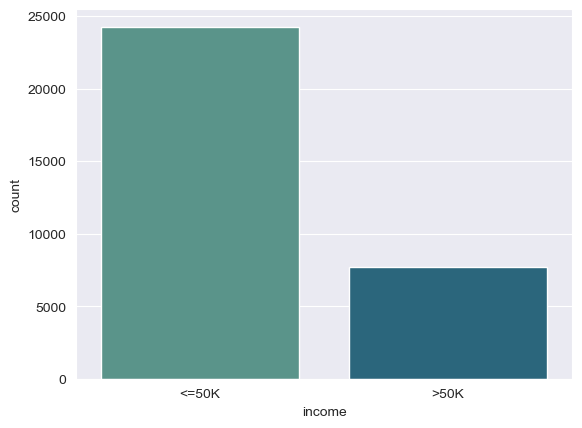

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='income',data=df,palette='crest')
print('income data is not balanced, need to handle it')

In [8]:
# Rename column name with dot
df.rename(columns = {'education.num':'education_len'}, inplace = True) 
df.rename(columns = {'marital.status':'marital_status'}, inplace = True) 

In [9]:
# The data have mixed categorical and numerical data
# now Split our data set into categorical and numerical for data analysis
# from above analysis, the age, fnlwgt and education_len are numerical columns
# the rest columns (workclass, martial_status, income etc.) are categorical
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(exclude=np.number)

In [93]:
#check if the numeric variable are correlated
corr = num.corr()
print(corr)
print('\n The variables are not closely correlated')

                    age    fnlwgt  education_len
age            1.000000 -0.076178       0.035951
fnlwgt        -0.076178  1.000000      -0.044539
education_len  0.035951 -0.044539       1.000000

 The variables are not closely correlated


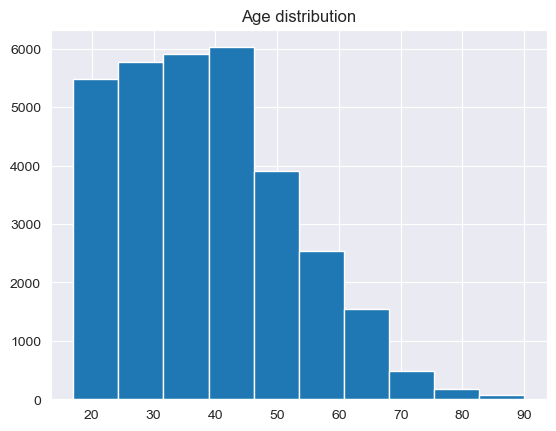

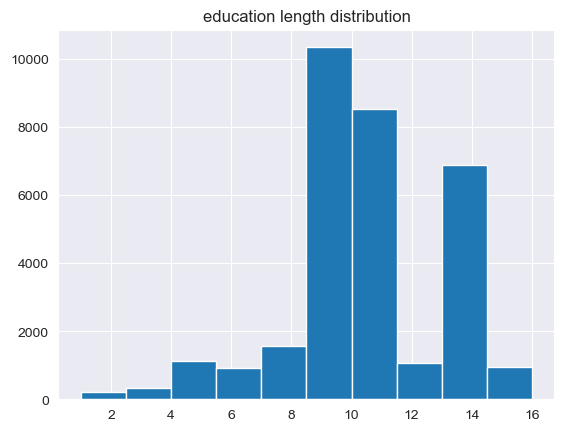

The distribution is close enough and resemble bell shape


In [29]:
# now I check distribution of age and education_len to see if they are normal distributed, 
#so I can decide if I need to standarlize them

plt.hist(num.age)
plt.title('Age distribution')
plt.show()

plt.hist(num.education_len)
plt.title('education length distribution')
plt.show()
print('The distribution is close enough and resemble bell shape')

<Axes: >

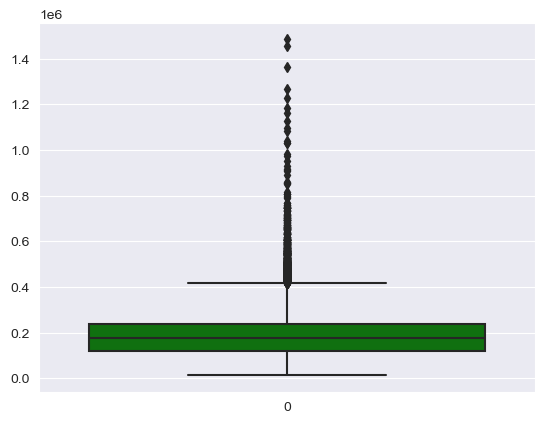

In [30]:
# check fnlwgt distribution
sns.boxplot(num['fnlwgt'],color='green')

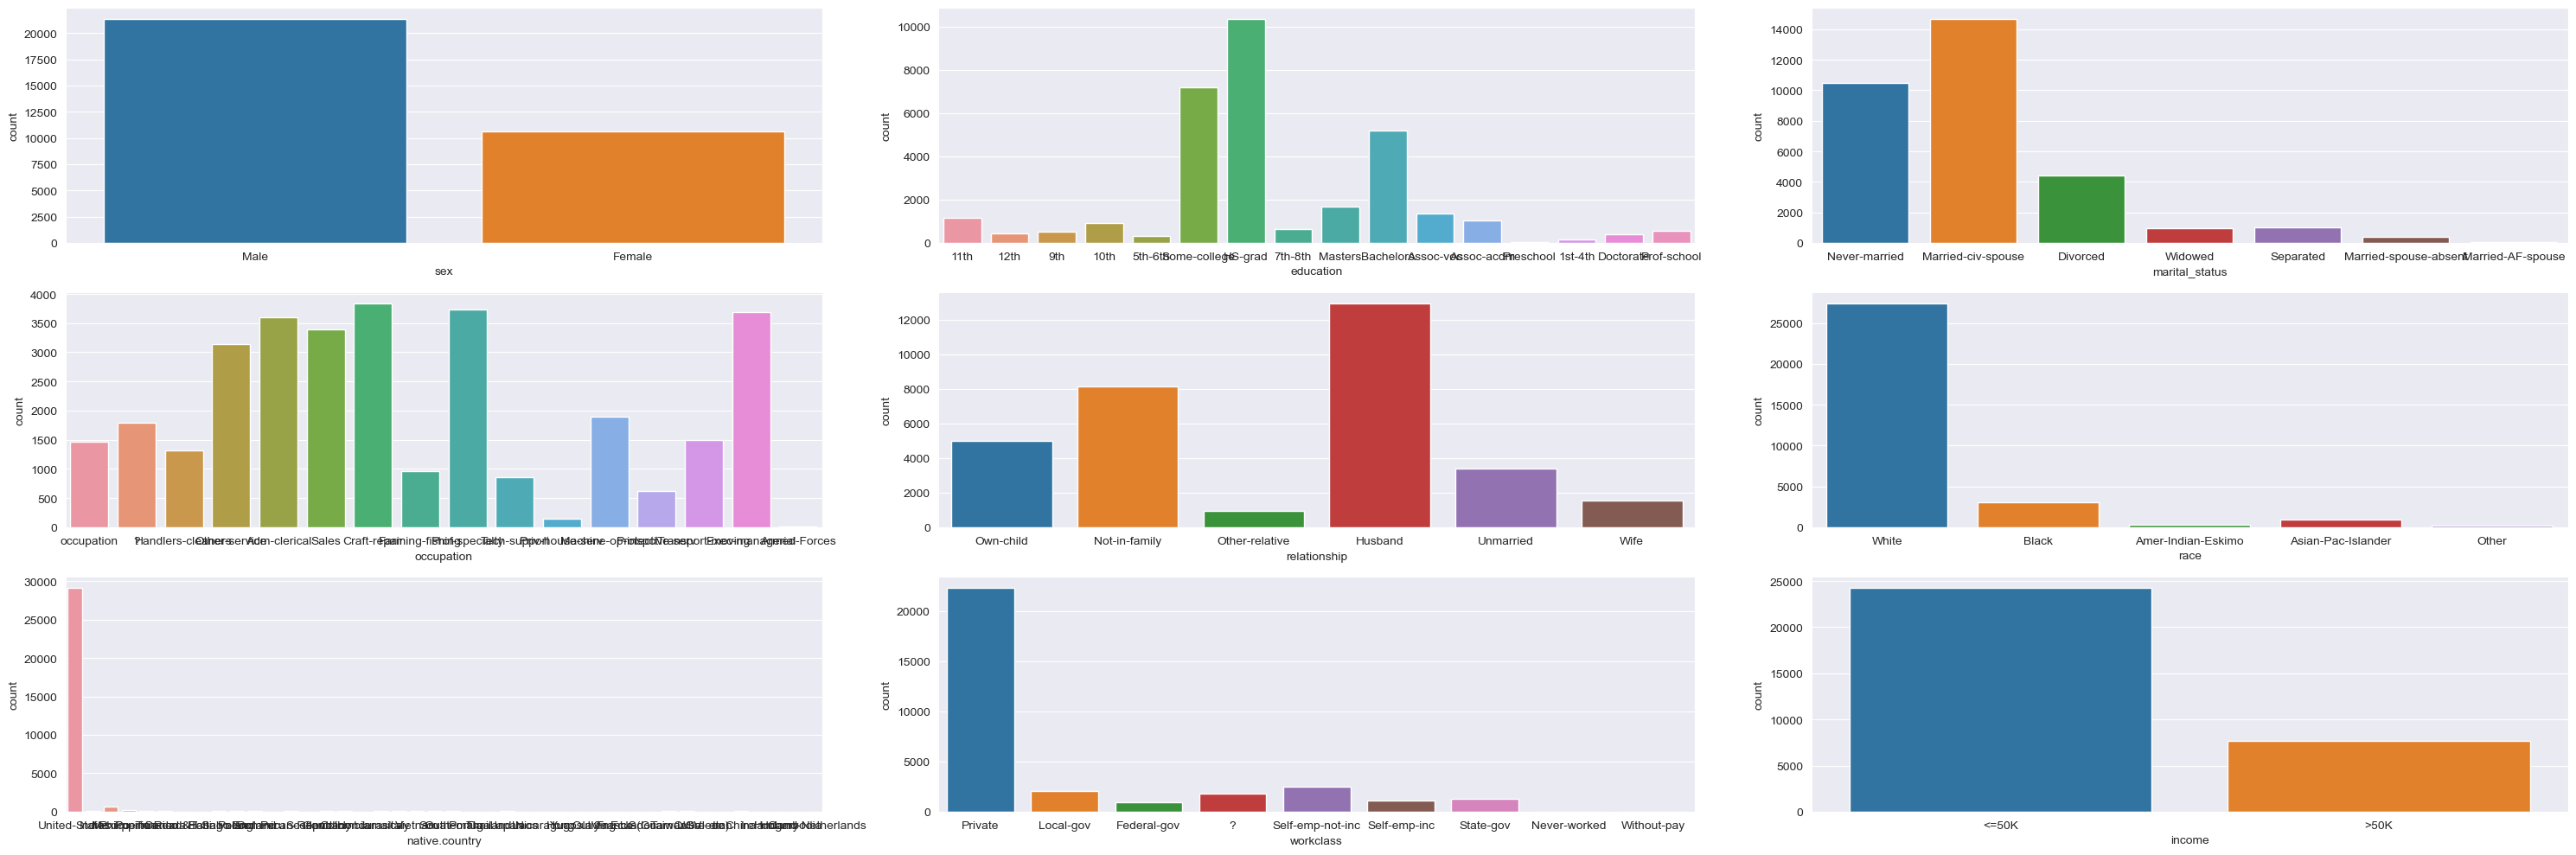

In [26]:
fig, ax = plt.subplots(3,3,figsize=(30,10))
sns.countplot(x='sex', data=cat,ax=ax[0,0])
sns.countplot(x='education',data=cat, ax=ax[0,1])
sns.countplot(x='marital_status',data=cat, ax=ax[0,2])
sns.countplot(x='occupation', data=cat,ax=ax[1,0])
sns.countplot(x='relationship',data=cat, ax=ax[1,1])
sns.countplot(x='race', data=cat,ax=ax[1,2])
sns.countplot(x='native.country', data=cat,ax=ax[2,0])
sns.countplot(x='workclass',data=cat, ax=ax[2,1])
sns.countplot(x='income', data=cat,ax=ax[2,2])
plt.tight_layout()

Text(0.5, 1.0, 'Race distribution')

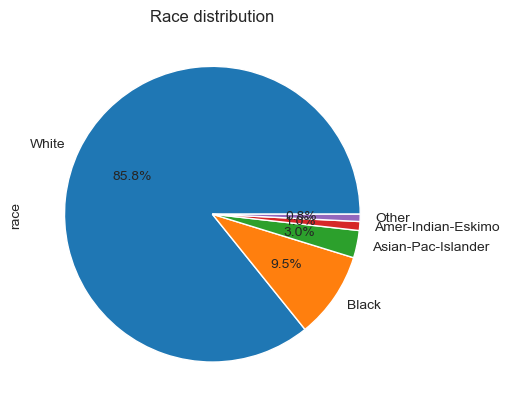

In [10]:
# I want to exam the race a little close to make sure it reflect the actual population distribution
data =df.race.value_counts()

data.plot(kind='pie', autopct='%0.1f%%')
plt.title('Race distribution')

In US, white and Black are dominating. Per census, 73.6% of us population are white in 1995, so it may reflect the true race distibution of poplulation. 

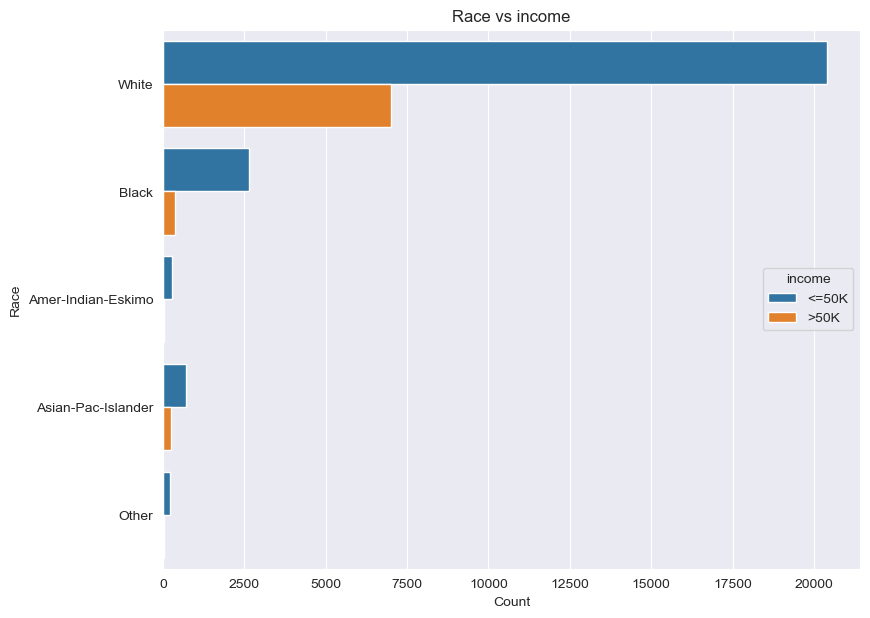

In [32]:
# check income based on race (this is new from original milestone 1 submission)
# distribution chart between marital status vs income
plt.figure(figsize=(9,7))
ax = sns.countplot(data=df, y='race', hue='income')

plt.xlabel('Count')
plt.ylabel('Race')
plt.title('Race vs income')

# Add legend
plt.legend
sns.move_legend(ax, "center right")

# Show the plot
plt.show()

Due to the race distribution, the data from minority race are limited, the impact of race on income may not have enough data to show. 

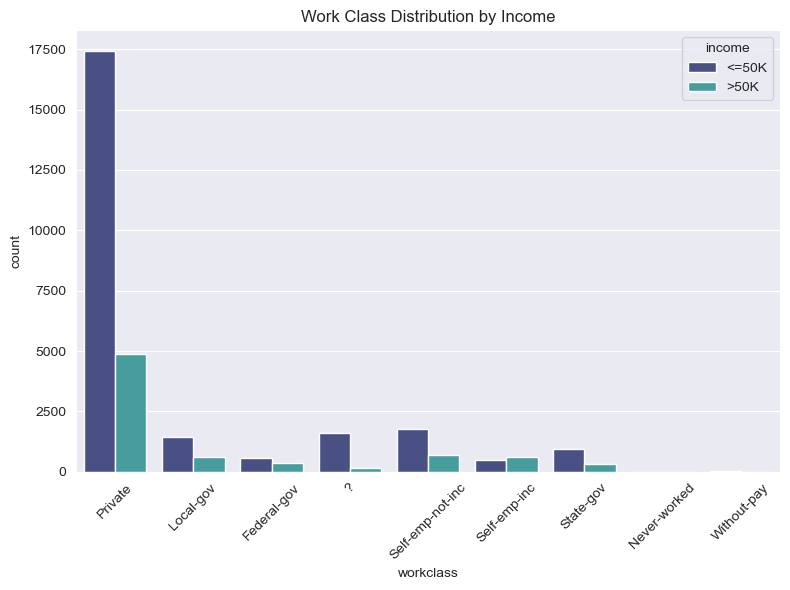

In [34]:
# plot work class distribution by income
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "workclass", hue = "income", palette = "mako")
plt.xticks(rotation = 45)
plt.title("Work Class Distribution by Income")
plt.tight_layout();

From the charts above, the private business owner have higher chance to have high income (> 50K dollars)

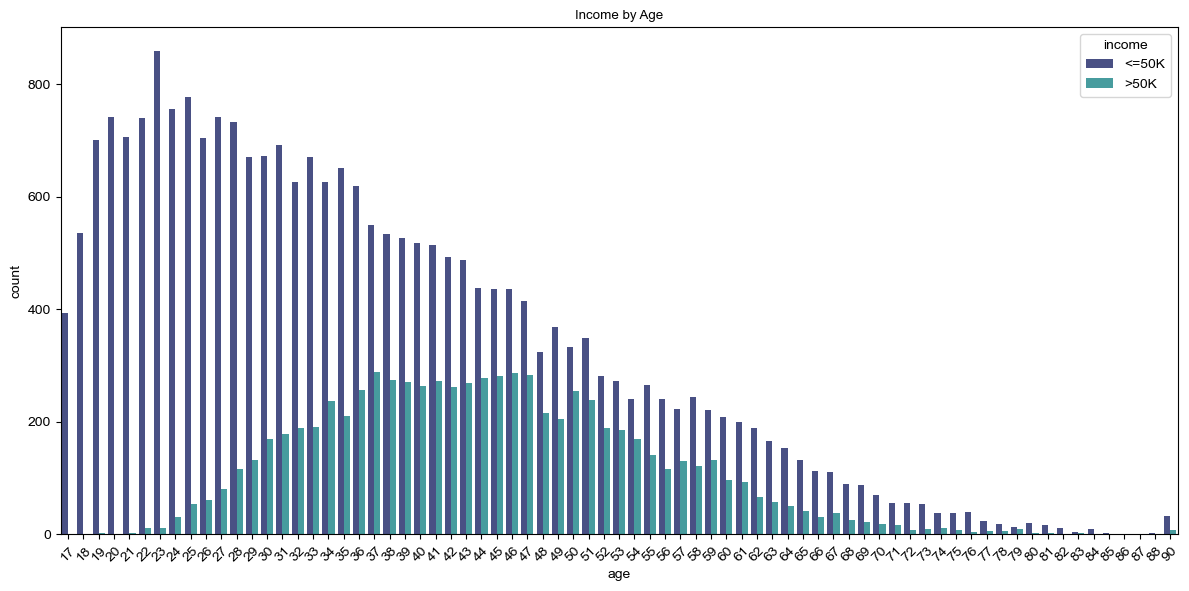

In [3]:
# plot age distribution by income
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = "age", hue = "income", palette = "mako")
plt.xticks(rotation = 45)
sns. set(font_scale= 0.8)
plt.title("Income by Age")
plt.tight_layout();

from the chart above, high income often show in middle age (age between 30 to 50), which make sense. Also the high income are likely normally distributed based on age.

###### from the above data check, the data is clean, also it is a good representation of the society, so good to use for further analysis.

###### Data preparation

In [11]:
# treat unknowns
# there are ''?'' in the 'workclass', 'native.country' and 'education' columns. convert them into 'unknown'
df['workclass'].replace('?', 'unknown', inplace=True)
df['occupation'].replace('?', 'unknown', inplace=True)
df['native.country'].replace('?', 'unknown', inplace=True)


# also notice the occupation has a lot of response as occupation, which is same as no answer, so convert it as unknown.
df['occupation'].replace('occupation', 'unknown', inplace=True)

In [12]:
# we know that workclass, occupation has unknown. so check how many are them
work_unknown = df['workclass'].value_counts()['unknown']
occupation_unknown = df['occupation'].value_counts()['unknown']
print('Ratio of unknown in workclass is', round(work_unknown/len(df['workclass']),2))
print('Ratio of unknown in occupation is', round(occupation_unknown/len(df['occupation']),2))

Ratio of unknown in workclass is 0.06
Ratio of unknown in occupation is 0.1


In [13]:
# remove irrelate or related variables.

# the 'education length' and 'education' are about the same information, so drop 'deucation' column.
df.drop('education', axis=1, inplace=True)

# the fnlwgt is a representation of population count, assume it was not quite related to income. so drop it
df.drop('fnlwgt', axis=1, inplace=True)

###### Feature Engineering

In [14]:
# income column and sex are actually binary category, so need to converted to 0 and 1 for future modeling.
def compute_income(x):
  if x=="<=50K":
    return 0
  elif(x=='>50K'):
    return 1

df['income']=df['income'].apply(compute_income)

df['sex']=df['sex'].apply(lambda x : 0 if x=='Male' else 1)

df.head()

,age,workclass,education_len,marital_status,occupation,relationship,race,sex,native.country,income
0,17,Private,7,Never-married,unknown,Own-child,White,0,United-States,0
1,17,Private,8,Never-married,unknown,Own-child,White,1,United-States,0
2,17,Private,5,Never-married,unknown,Own-child,White,0,United-States,0
3,17,Private,7,Never-married,unknown,Own-child,White,0,United-States,0
4,17,Private,7,Never-married,unknown,Own-child,White,1,United-States,0


Currently the dataframe have mix of numerical and categorical columns, which is hard to use any models I am familar with. I have converted income/sex from binary categories into numerical, I can continue convert rest so I can use prediction model for numerical variables.

In [15]:
# work class has big impact to income, so convert it to numeric using mean encoding.

work=dict()
uni_work=df['workclass'].unique()

for i in uni_work:
  mean1=df[df['workclass']==i]['income'].mean()
  work.update({i:mean1})
    
df['workclass']=df['workclass'].apply(lambda x: work.get(x))    

In [16]:
# now convert rest categorical columns 
categorical_cols = ['marital_status', 'occupation', 'relationship', 'race', 'native.country']
newdf = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
newdf

,age,workclass,education_len,sex,income,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_unknown
0,17,0.218792,7,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,17,0.218792,8,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,17,0.218792,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,17,0.218792,7,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,17,0.218792,7,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,0.098425,4,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
31943,90,0.387063,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31944,90,0.218792,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31945,90,0.098425,9,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


###### Model building

In [17]:
# split data set and treat imbalance

#spliting of data into dependent and independent variables
x=newdf.drop('income',axis=1)
y=newdf['income']

# treat income imbalance situation
from imblearn.over_sampling import SMOTE 

sm = SMOTE(sampling_strategy='auto', random_state=42)
x_sample,y_sample=sm.fit_resample(x,y)

In [18]:
# standarlize the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_std=pd.DataFrame(sc.fit_transform(x_sample),columns=x.columns)

#split training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_std,y_sample,test_size=0.3)

In [20]:
# build a simple random froest classifier

from sklearn.ensemble import RandomForestClassifier

rand=RandomForestClassifier(random_state=42)
rand.fit(x_train,y_train)

pres=rand.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,pres))
print('Accuracy is 0.86 for the simple random forest classifier')

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      7372
           1       0.84      0.89      0.86      7187

    accuracy                           0.86     14559
   macro avg       0.86      0.86      0.86     14559
weighted avg       0.86      0.86      0.86     14559

Accuracy is 0.86 for the simple random forest classifier


In [21]:
model2 = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [22]:
# use hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [23]:
# find out best estimator
best_RF_model = grid_search_rf.best_estimator_
y_pred_rf=best_RF_model.predict(x_test)

In [24]:
# save the model since it takes 10 mins to run each time
#save the model
import joblib as jb
jb.dump(best_RF_model, "RFmodel.pkl")
# model = joblib.load("RFmodel.pkl")

['RFmodel.pkl']

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_rf)
print("random forest regression with hyperparameter tuning Accuracy:", round(accuracy,2))

random forest regression with hyperparameter tuning Accuracy: 0.87


In [19]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7270
           1       0.84      0.89      0.87      7289

    accuracy                           0.86     14559
   macro avg       0.86      0.86      0.86     14559
weighted avg       0.86      0.86      0.86     14559



In [20]:
# now try XGBoost
#from xgboost import XGBClassifier
import xgboost as xgb

print(xgb.__version__)

1.7.3


In [21]:
from xgboost import XGBClassifier

In [22]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
y_pred_xg = xg.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7270
           1       0.83      0.89      0.86      7289

    accuracy                           0.86     14559
   macro avg       0.86      0.86      0.86     14559
weighted avg       0.86      0.86      0.86     14559



In [25]:
# create confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

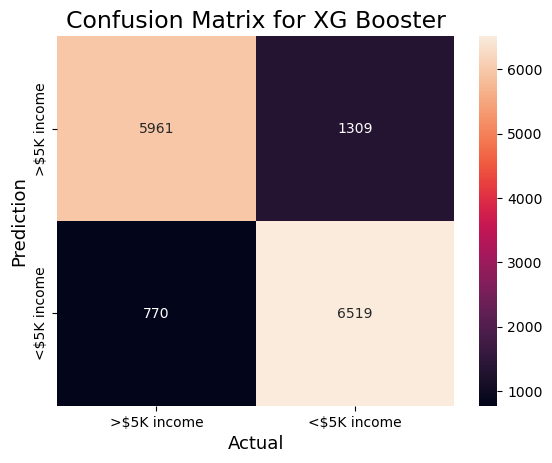

In [26]:
cm = confusion_matrix(y_test,y_pred_xg)

#visualize the confusion matrix for XGBooster model
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['>$5K income','<$5K income'],
            yticklabels=['>$5K income','<$5K income'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for XG Booster',fontsize=17)
plt.show()

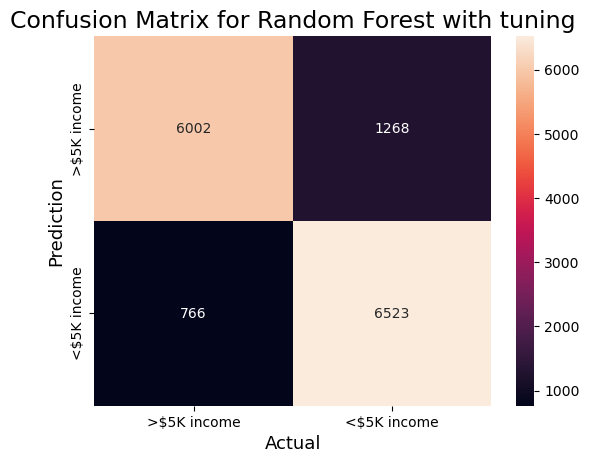

In [27]:
#visualize the confusion matrix for Random forest model
cm2 = confusion_matrix(y_test,y_pred_rf)

sns.heatmap(cm2, 
            annot=True,
            fmt='g', 
            xticklabels=['>$5K income','<$5K income'],
            yticklabels=['>$5K income','<$5K income'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Random Forest with tuning',fontsize=17)
plt.show()

In [26]:
# Use random forest to reveal the importance of independent variables to income.

# Calculate feature importance
feature_importances = best_RF_model.feature_importances_

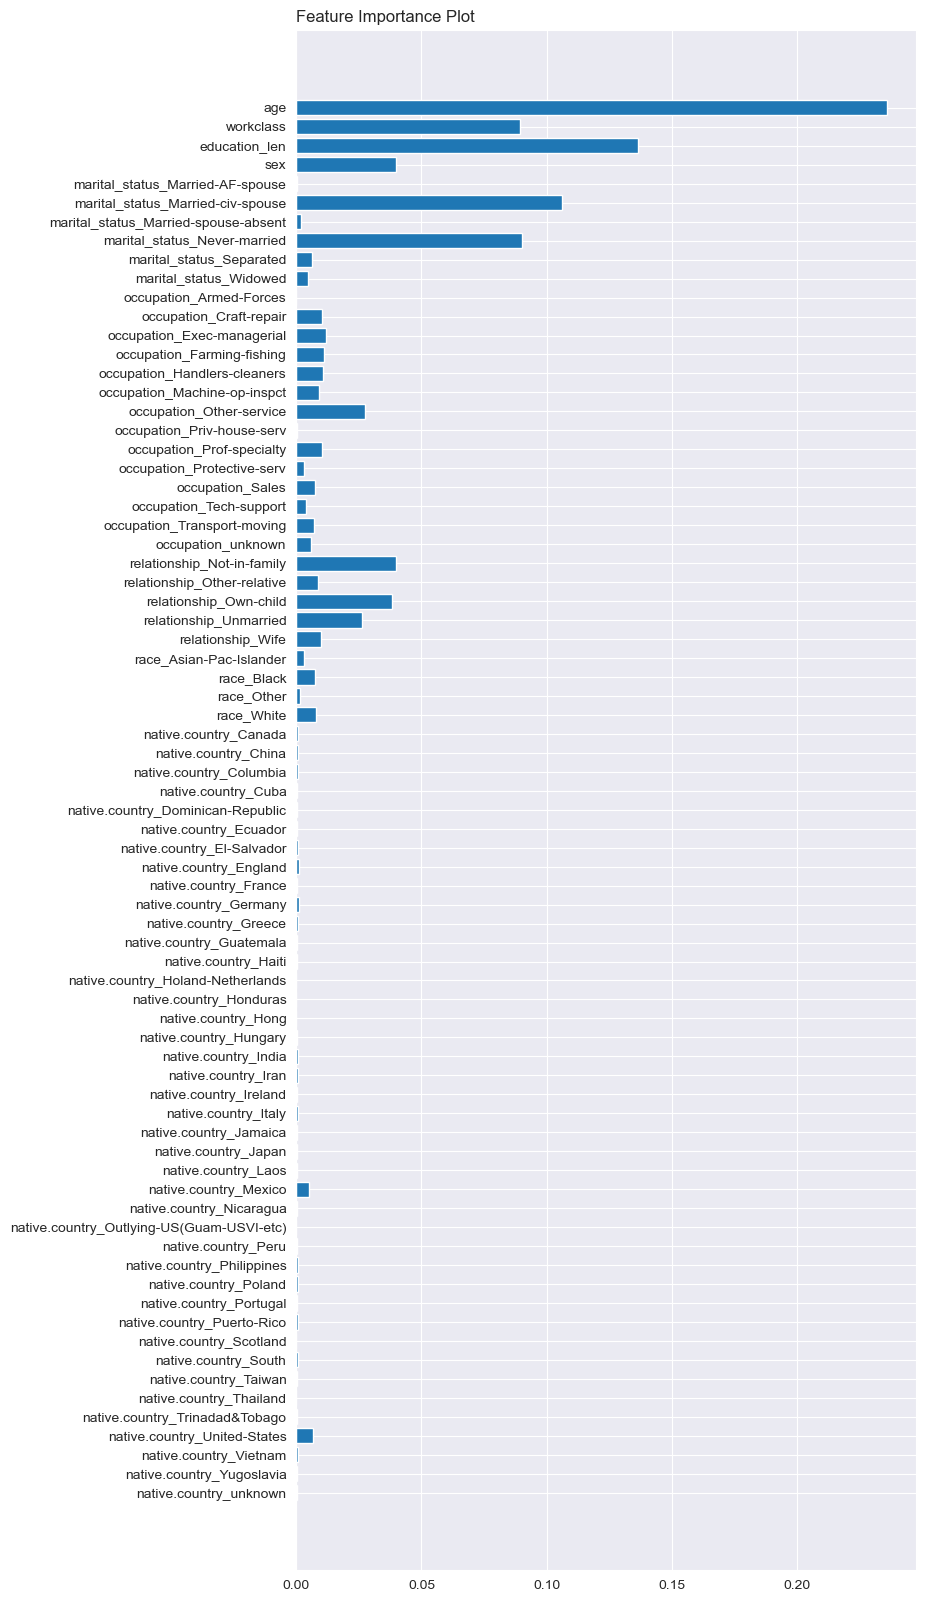

In [28]:
# plot feature importance
fig, ax = plt.subplots(figsize =(8, 20))

ax.barh(x_train.columns, feature_importances )

ax.invert_yaxis()

ax.set_title('Feature Importance Plot',loc ='left', )

plt.show()

##### Conclusion
1. Overall, Random Forest with tuned parameters and XGBooster model both achieved 86% accuracy. Both are doing well to predict class to their should be class (high income classified as high income, and, low income classified as low)

2. Based on business need, the precision and recall are also important.from this aspect, Random forest with tuned parameters is a slightly better choice. 

3. From feature importance chart, the age and education length are the two most important factors to determine people into high income level. 

In [28]:
# validate with original imbalanced data on random forest model

# first try to apply random forest model to original data before balance.
x2_std=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

x2_train,x2_test,y2_train,y2_test=train_test_split(x2_std,y,test_size=0.3)

In [29]:
y2_pred=best_RF_model.predict(x2_test)

In [30]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      7309
           1       0.48      0.91      0.63      2276

    accuracy                           0.75      9585
   macro avg       0.72      0.80      0.72      9585
weighted avg       0.85      0.75      0.77      9585



In [32]:
# validate prediction on original imbalanced data with XGbooster model
y_pred_xg=xg.predict(x2_test)
print(classification_report(y2_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      0.28      0.43      7309
           1       0.30      0.99      0.46      2276

    accuracy                           0.44      9585
   macro avg       0.64      0.63      0.44      9585
weighted avg       0.82      0.44      0.44      9585



If applying the model to original raw dataset, which is imbalanced, looks like both models are still doing good job to identify high income group as high income group, however, both are tend to classify many low income as high income. so it is important to balance data before using these 2 models. 